In [2]:
import numpy as np
import scipy as sp
from scipy import linalg as lg
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
get_ipython().magic(u'matplotlib inline')

In [3]:
#Gravedad como funcion de la latitud

In [4]:
#Unidades canonicas
ul = 100000.0
um = 5.97e24
ut = 1.58471    

In [5]:
#Gravedad radial y latitudinal

#Datos
J = 0.0010826359  #adimencional
w = 1.155587e-4   #rad/ut
a = 63.781        #ul

#Radial
def g_r(l,r):
    #Contribuciones a g
    g1 = 1./r**2
    g2 = 1.5*J*a**2*( 3*np.sin(l)**2 - 1.0)/r**4
    g3 = r*w**2*np.cos(l)**2
    gt = g1 - g2 - g3
    return gt

#Latitudinal
def g_l(l,r):
    gl = 3*J*a**2/r**4 + r*w**2*np.cos(l)*np.sin(l)
    return gl    

In [6]:
#Graficos de gravedad radial y latitudinal

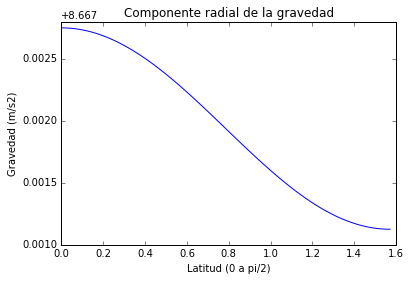

In [7]:
#Datos
r = 67.68
l = np.linspace(0,np.pi/2.0,100)
fac = ul*1/ut**2

gs_r = fac*g_r(l,r)
gs_l = fac*g_l(l,r)
#print gs_r

plt.plot(l,gs_r)
plt.title('Componente radial de la gravedad')
plt.xlabel('Latitud (0 a pi/2)')
plt.ylabel('Gravedad (m/s2)')

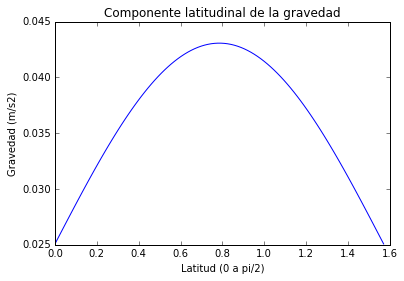

In [8]:
plt.plot(l,gs_l)
plt.title('Componente latitudinal de la gravedad')
plt.xlabel('Latitud (0 a pi/2)')
plt.ylabel('Gravedad (m/s2)')

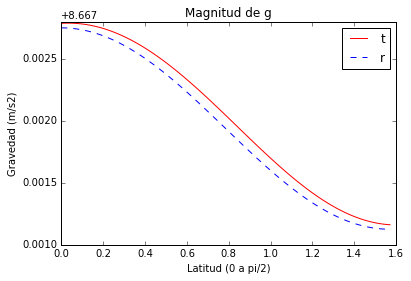

In [36]:
#Gravedad total
gs_t = []
for i in xrange(len(l)):
    suma = ( gs_r[i]**2 + gs_l[i]**2 )**0.5
    gs_t.append(suma)

plt.plot(l,gs_t,'red')
plt.plot(l,gs_r,'--')
plt.title('Magnitud de g')
plt.xlabel('Latitud (0 a pi/2)')
plt.ylabel('Gravedad (m/s2)')
plt.legend('t''r')

In [10]:
#Solucion para la estacion espacial internacional

In [116]:
#Solucion en cartesianas

#Datos
#J = 0.0010826359  #adimencional
J=0.0
#w = 1.155587e-4   #rad/ut
w = 0.0
a = 63.781        #ul

#Gradiente del potencial y componentes de g
def comp(x,y,z):
    #Radio
    r = (x**2 + y**2 + z**2)**0.5
    
    #Angulos teta y fi
    teta = np.arccos(z/r)
    fi = np.arctan(y/x)
    
    #terminos
    g1 = 1./r**2
    g2 = 1.5*J*a**2*( 3*np.cos(teta)**2 - 1.0)/r**4
    g3 = r*w**2*np.sin(teta)**2
    gt = -(g1 - g2 - g3)
    
    #Componentes
    gx = gt*np.sin(teta)*np.cos(fi)
    gy = gt*np.sin(teta)*np.sin(fi)
    gz = gt*np.cos(teta)
    
    Comp = np.array([gx,gy,gz])
    return Comp

In [117]:
#datos
"""
2457559.000000000 = A.D. 2016-Jun-19 12:00:00.0000 (TDB)
"""
#Convercion a canonicas (Pos y vel)
cp = 1000.0*1/ul 
cv = cp*ut       

#Condiciones iniciales tomadas de la pagina de la NASA
P0 = [cp*1.433941843173968E+03, -cp*4.287553187880788E+03, -cp*5.060678920195190E+03]
V0 = [cv*6.093417889432424E+00,  cv*4.246108459500676E+00, -cv*1.871384624404696E+00]

In [164]:
#Solucion con Odeint

#Sistema de ecuaciones
def ecuaciones(y,t):
    
    dydt = np.zeros(len(y))
    
    dydt[0] = y[3]
    dydt[1] = y[4]
    dydt[2] = y[5]
    dydt[3] = comp(y[0],y[1],y[2])[0]
    dydt[4] = comp(y[0],y[1],y[2])[1]
    dydt[5] = comp(y[0],y[1],y[2])[2]
    
    return dydt

#Tiempo y condiciones iniciales
ts = np.linspace(10,1600,1000)
y0 = [cp*1.433941843173968E+03, -cp*4.287553187880788E+03, -cp*5.060678920195190E+03,
      cv*6.093417889432424E+00,  cv*4.246108459500676E+00, -cv*1.871384624404696E+00]

#Soluciones
Sol = integrate.odeint(ecuaciones,y0,ts)

In [165]:
#Graficas

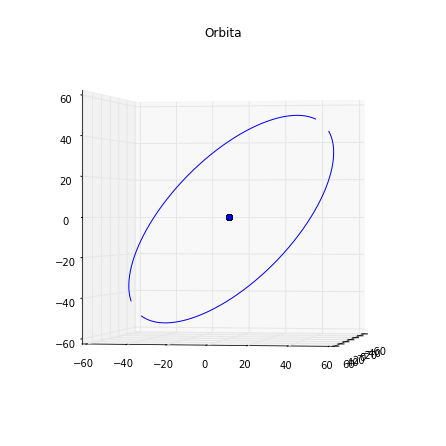

In [166]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot(Sol[:,0],Sol[:,1],Sol[:,2],'blue')
ax.plot(-Sol[:,0],-Sol[:,1],-Sol[:,2],'blue')
ax.plot(-0*Sol[:,0],-0*Sol[:,1],-0*Sol[:,2],'bo')
ax.view_init(elev=0,azim=10)
plt.title('Orbita')

In [167]:
#Magnitudes de r
Mags = []
for i in xrange(0,len(Sol[:,0])):
    suma = ( Sol[:,0][i]**2 + Sol[:,1][i]**2 + Sol[:,2][i]**2 )**0.5
    Mags.append(suma)
    
#Informacion de la orbita    
Perigeo = Mags[0]*ul - 6378.1e3
print 'Perigeo en Km',Perigeo*10**(-3)

inc = np.arccos(Sol[:,2][-1]/(Sol[:,0][-1]**2 + Sol[:,1][-1]**2 + Sol[:,2][-1]**2)**0.5)
print 'La inclinacion de la orbita es', inc*180.0/np.pi

Perigeo en Km 407.89828189
La inclinacion de la orbita es 50.0658269116
